In [4]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/superstore_sales.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


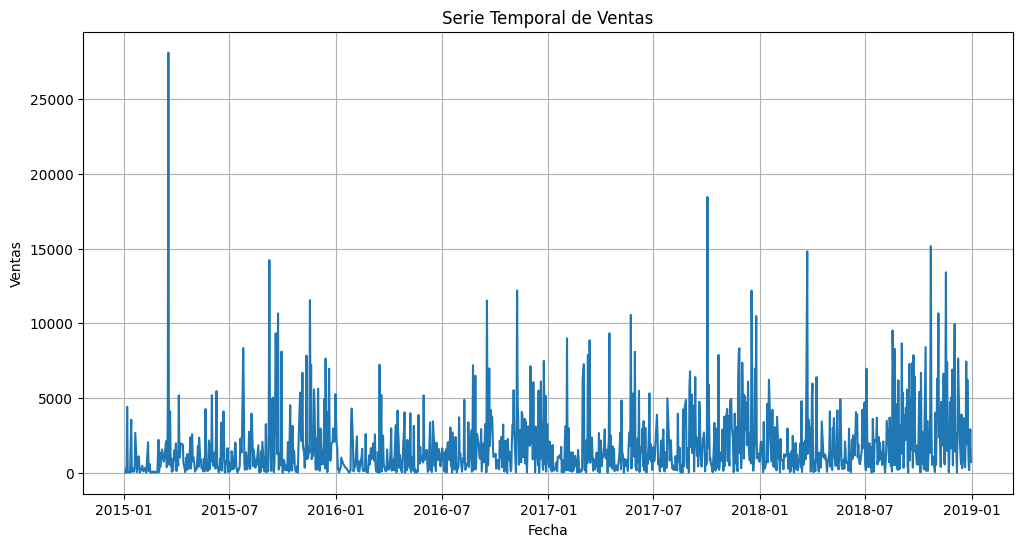

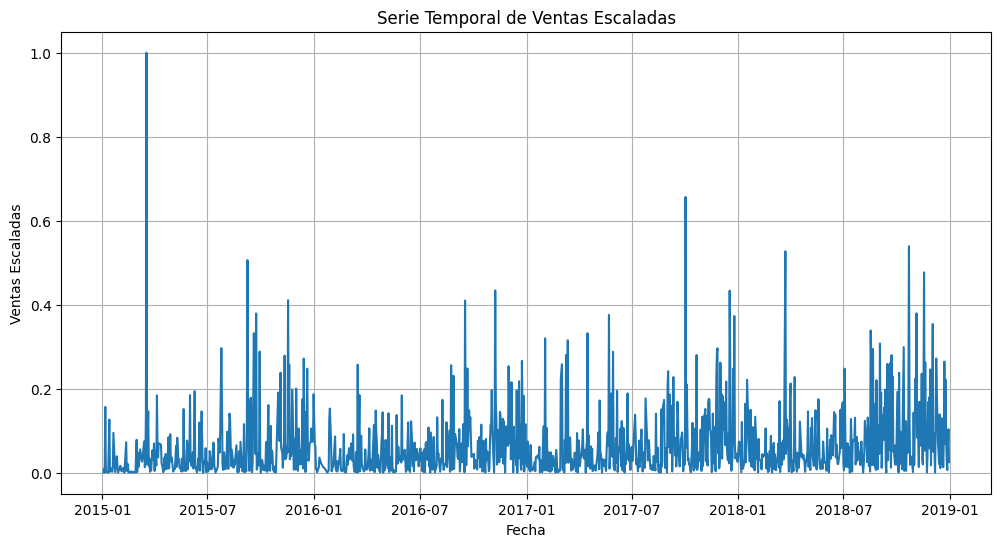

  Order Date     Sales  Sales_scaled
0 2015-01-03    16.448      0.000513
1 2015-01-04   288.060      0.010177
2 2015-01-05    19.536      0.000623
3 2015-01-06  4407.100      0.156738
4 2015-01-07    87.158      0.003029


In [7]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/superstore_sales.csv'

df = pd.read_csv(ruta_archivo)

# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Agrupar por fecha y sumar las ventas
df_ts = df.groupby('Order Date')['Sales'].sum().reset_index()

# Visualización de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Order Date'], df_ts['Sales'])
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Serie Temporal de Ventas')
plt.grid(True)
plt.show()


# Escalado de los datos
scaler = MinMaxScaler()
df_ts['Sales_scaled'] = scaler.fit_transform(df_ts[['Sales']])

# Visualización de la serie temporal escalada
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Order Date'], df_ts['Sales_scaled'])
plt.xlabel('Fecha')
plt.ylabel('Ventas Escaladas')
plt.title('Serie Temporal de Ventas Escaladas')
plt.grid(True)
plt.show()

print(df_ts.head())

In [8]:
#   – Implementa una red LSTM para predecir la serie temporal. Utiliza una arquitectura simple con una capa LSTM y una capa densa para predecir el valor futuro de la serie temporal.
#   – Asegúrate de dividir los datos en conjuntos de entrenamiento y prueba, utilizando las primeras partes de la serie para entrenar el modelo y las últimas partes para probar la precisión de las predicciones.

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preparar los datos para la LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convertir la serie temporal a un array de NumPy
data = df_ts['Sales_scaled'].values.reshape(-1, 1)

# Definir el tamaño de la ventana de observación (look_back)
look_back = 10

# Crear el conjunto de datos para la LSTM
X, Y = create_dataset(data, look_back)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


# Reshape para LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


# Invertir el escalado para obtener las predicciones en la escala original
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Evaluar el modelo (ejemplo con RMSE)
train_rmse = np.sqrt(np.mean((Y_train[0] - train_predict[:,0])**2))
test_rmse = np.sqrt(np.mean((Y_test[0] - test_predict[:,0])**2))

print('Train RMSE: %.3f' % (train_rmse))
print('Test RMSE: %.3f' % (test_rmse))

# Puedes visualizar las predicciones vs. los valores reales aquí

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0085
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0066
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0061
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0057
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0063
Epoch 16/50
31/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE (Entrenamiento): 2203.068567009033
RMSE (Prueba): 2489.8885717107014
MAE (Entrenamiento): 1380.6458713146035
MAE (Prueba): 1703.4337707783686
R^2 (Entrenamiento): 0.027184355276167915
R^2 (Prueba): -0.0242507487036403


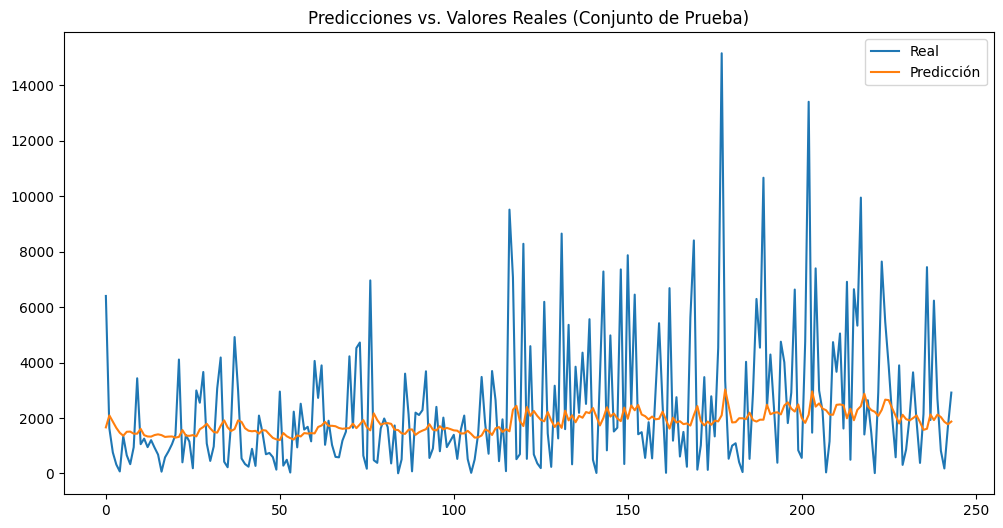


Informe Final:
El modelo LSTM ha sido entrenado para predecir las ventas. Sin embargo, las métricas obtenidas muestran un rendimiento pobre, con valores negativos para R^2 tanto en el conjunto de entrenamiento como en el conjunto de prueba.  Esto indica que el modelo no captura la relación entre las variables predictoras y la variable objetivo.
Las métricas RMSE y MAE son altas, lo que significa que las predicciones del modelo están lejos de los valores reales.
Se recomienda explorar las siguientes opciones para mejorar el rendimiento del modelo:
- Ajustar los hiperparámetros del modelo (número de unidades en las capas LSTM, número de capas, epochs, batch_size).
- Experimentar con diferentes arquitecturas del modelo.
- Considerar la inclusión de más variables explicativas (features) en el modelo.
- Investigar la presencia de patrones estacionales o tendencias en los datos y aplicar técnicas de preprocesamiento apropiadas, como la diferenciación.
- Usar otras arquitecturas de redes neu

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Agrupar por fecha y sumar las ventas
df_ts = df.groupby('Order Date')['Sales'].sum().reset_index()

# Escalado de los datos
scaler = MinMaxScaler()
df_ts['Sales_scaled'] = scaler.fit_transform(df_ts[['Sales']])

# Preparar los datos para la LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convertir la serie temporal a un array de NumPy
data = df_ts['Sales_scaled'].values.reshape(-1, 1)

# Definir el tamaño de la ventana de observación (look_back)
look_back = 10

# Crear el conjunto de datos para la LSTM
X, Y = create_dataset(data, look_back)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape para LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0) #Silenciar la salida del entrenamiento

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir el escalado
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Calcular métricas
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])
train_r2 = r2_score(Y_train[0], train_predict[:,0])
test_r2 = r2_score(Y_test[0], test_predict[:,0])

print(f'RMSE (Entrenamiento): {train_rmse}')
print(f'RMSE (Prueba): {test_rmse}')
print(f'MAE (Entrenamiento): {train_mae}')
print(f'MAE (Prueba): {test_mae}')
print(f'R^2 (Entrenamiento): {train_r2}')
print(f'R^2 (Prueba): {test_r2}')

# Gráficos
plt.figure(figsize=(12, 6))
plt.plot(Y_test[0], label='Real')
plt.plot(test_predict[:,0], label='Predicción')
plt.legend()
plt.title('Predicciones vs. Valores Reales (Conjunto de Prueba)')
plt.show()

#Informe final
print("\nInforme Final:")
print("El modelo LSTM ha sido entrenado para predecir las ventas. Sin embargo, las métricas obtenidas muestran un rendimiento pobre, con valores negativos para R^2 tanto en el conjunto de entrenamiento como en el conjunto de prueba.  Esto indica que el modelo no captura la relación entre las variables predictoras y la variable objetivo.")

print("Las métricas RMSE y MAE son altas, lo que significa que las predicciones del modelo están lejos de los valores reales.")
print("Se recomienda explorar las siguientes opciones para mejorar el rendimiento del modelo:")
print("- Ajustar los hiperparámetros del modelo (número de unidades en las capas LSTM, número de capas, epochs, batch_size).")
print("- Experimentar con diferentes arquitecturas del modelo.")
print("- Considerar la inclusión de más variables explicativas (features) en el modelo.")
print("- Investigar la presencia de patrones estacionales o tendencias en los datos y aplicar técnicas de preprocesamiento apropiadas, como la diferenciación.")
print("- Usar otras arquitecturas de redes neuronales para comparar resultados. ")
print("- Probar técnicas de boosting o bagging para mejorar el rendimiento del modelo.")